In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer 



In [2]:
import pandas as pd
data =pd.read_csv("D:\\Sage\\OnlineTraining\\SageTextClassification.csv", encoding='latin-1')
data.shape

(230, 3)

In [3]:
set(data['Sub-Category'].values) # checking unique values in sub category

{'Agricultural and Biological Sciences',
 'Biochemistry, Genetics and Molecular Biology',
 'Chemistry',
 'Environmental Science',
 'Immunology and Microbiology',
 'Neuroscience',
 'engineering',
 nan}

In [4]:
data['Sub-Category'].mode().values #cheking which category is repeating most times

array(['engineering'], dtype=object)

In [5]:
data['Sub-Category']=data['Sub-Category'].fillna(data['Sub-Category'].mode().values[0]) # replacing nan values with mode

In [6]:
set(data['Sub-Category'].values) # cheking whther nan still exist or not

{'Agricultural and Biological Sciences',
 'Biochemistry, Genetics and Molecular Biology',
 'Chemistry',
 'Environmental Science',
 'Immunology and Microbiology',
 'Neuroscience',
 'engineering'}

In [7]:
tfidf=TfidfVectorizer(stop_words="english", ngram_range =(1,2), lowercase=True)
tf_idf_op=tfidf.fit_transform(data['Abstract'].values)   # converting data to tf_idf vectorization which includes uingrams & bigrams

In [8]:
data['Sub-Category']=data['Sub-Category'].str.replace(" ","") # removing space between category words

In [9]:
data['Sub-Category'].head() 

0                        EnvironmentalScience
1                        EnvironmentalScience
2    Biochemistry,GeneticsandMolecularBiology
3    Biochemistry,GeneticsandMolecularBiology
4           AgriculturalandBiologicalSciences
Name: Sub-Category, dtype: object

In [10]:
# in order to perform onehot encoder the data shoud be numeric form for tht 
#we are converitng the categories into the nuneric form so that they can be used by the one-hot encoder function
import numpy as np
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data['Sub-Category'])
integer_encoded # which contains the list of numeric values inwhich each values represents a category

array([3, 3, 1, 1, 0, 3, 3, 3, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6,
       6, 6, 2, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 2, 2, 2, 2, 6, 2, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 6, 2,
       6, 6, 6, 6, 6, 6, 2, 6, 6, 2], dtype=int64)

In [11]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse =False) # sparse =false which makes it as array
sub_category=pd.DataFrame(enc.fit_transform(integer_encoded.reshape(len(integer_encoded),1)),columns=[label_encoder.classes_]) # convering it as dataframe

In [12]:
sub_category.head()

,AgriculturalandBiologicalSciences,"Biochemistry,GeneticsandMolecularBiology",Chemistry,EnvironmentalScience,ImmunologyandMicrobiology,Neuroscience,engineering
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
tf_idf_op=tf_idf_op.toarray()   # actually tf_idf_op in  csr_ form but megre funciton does not accept it so we have to make it as ana rray 
tf_idf_op.shape


(230, 27943)

In [14]:
tf_idf_output=pd.DataFrame(tf_idf_op,columns=tfidf.vocabulary_) # convertingtf_idf vectorization to dataframe

In [15]:
tf_idf_output.head()

,repeated,wi,fi,studies,causes,oxidative,stress,sperm,testicular,damage,...,coarsely homogenized,homogenized raw,raw consumable,tissues quantified,quantified work,work needed,needed test,test viability,viability ed,xrf calibrations
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.036341,0.0,0.041323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
x = tf_idf_output
print(x)

     repeated   wi        fi   studies  causes  oxidative    stress     sperm  \
0    0.000000  0.0  0.000000  0.000000     0.0        0.0  0.000000  0.000000   
1    0.000000  0.0  0.000000  0.000000     0.0        0.0  0.000000  0.000000   
2    0.036341  0.0  0.041323  0.000000     0.0        0.0  0.000000  0.000000   
3    0.000000  0.0  0.000000  0.000000     0.0        0.0  0.000000  0.000000   
4    0.000000  0.0  0.000000  0.000000     0.0        0.0  0.000000  0.000000   
5    0.000000  0.0  0.000000  0.000000     0.0        0.0  0.000000  0.000000   
6    0.000000  0.0  0.000000  0.000000     0.0        0.0  0.000000  0.000000   
7    0.000000  0.0  0.000000  0.000000     0.0        0.0  0.000000  0.000000   
8    0.000000  0.0  0.000000  0.000000     0.0        0.0  0.000000  0.000000   
9    0.000000  0.0  0.000000  0.000000     0.0        0.0  0.000000  0.000000   
10   0.000000  0.0  0.000000  0.000000     0.0        0.0  0.000000  0.000000   
11   0.000000  0.0  0.000000

In [17]:
y=data['Topic']   # whcih is y_label
print(y)

0          Life Sciences
1          Life Sciences
2          Life Sciences
3          Life Sciences
4          Life Sciences
5          Life Sciences
6          Life Sciences
7          Life Sciences
8          Life Sciences
9          Life Sciences
10         Life Sciences
11         Life Sciences
12         Life Sciences
13         Life Sciences
14         Life Sciences
15         Life Sciences
16         Life Sciences
17         Life Sciences
18         Life Sciences
19         Life Sciences
20         Life Sciences
21         Life Sciences
22         Life Sciences
23         Life Sciences
24         Life Sciences
25         Life Sciences
26         Life Sciences
27         Life Sciences
28         Life Sciences
29         Life Sciences
             ...        
200    physical_sciences
201    physical_sciences
202    physical_sciences
203    physical_sciences
204    physical_sciences
205    physical_sciences
206    physical_sciences
207    physical_sciences
208    physical_sciences


In [18]:
#import numpy as np

final_data=pd.concat([sub_category, tf_idf_output], axis=1, sort=False)   # here we are merging two dataframes 



In [19]:
final_data=pd.concat([y,sub_category, tf_idf_output], axis=1, sort=False)   # here we are merging two dataframes

In [20]:
final_data.shape # which is x_data

(230, 27951)

In [21]:
final_data.head()

,Topic,"(AgriculturalandBiologicalSciences,)","(Biochemistry,GeneticsandMolecularBiology,)","(Chemistry,)","(EnvironmentalScience,)","(ImmunologyandMicrobiology,)","(Neuroscience,)","(engineering,)",repeated,wi,...,coarsely homogenized,homogenized raw,raw consumable,tissues quantified,quantified work,work needed,needed test,test viability,viability ed,xrf calibrations
0,Life Sciences,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Life Sciences,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Life Sciences,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.036341,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Life Sciences,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Life Sciences,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Logistic Regression

In [22]:
##data spiliting 

from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y ,test_size=0.2,random_state=101)
print("train x_data shape is",train_x.shape)
print("train y_data shape is",train_y.shape)
print("test x_data shape is",test_x.shape)
print("test y_data shape is",test_y.shape)

train x_data shape is (184, 27943)
train y_data shape is (184,)
test x_data shape is (46, 27943)
test y_data shape is (46,)


In [23]:
#model training

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
# model prediction for test data
y_predicted=lr.predict(test_x)
print(y_predicted)

['Life Sciences' 'physical_sciences' 'physical_sciences' 'Life Sciences'
 'physical_sciences' 'Life Sciences' 'Life Sciences' 'physical_sciences'
 'Life Sciences' 'physical_sciences' 'physical_sciences' 'Health Sciences'
 'physical_sciences' 'physical_sciences' 'physical_sciences'
 'physical_sciences' 'Life Sciences' 'Life Sciences' 'physical_sciences'
 'Life Sciences' 'Health Sciences' 'Life Sciences' 'physical_sciences'
 'physical_sciences' 'Life Sciences' 'physical_sciences'
 'physical_sciences' 'physical_sciences' 'Health Sciences'
 'Health Sciences' 'Life Sciences' 'physical_sciences' 'physical_sciences'
 'Life Sciences' 'physical_sciences' 'Life Sciences' 'Life Sciences'
 'physical_sciences' 'physical_sciences' 'Life Sciences'
 'physical_sciences' 'physical_sciences' 'Life Sciences' 'Health Sciences'
 'physical_sciences' 'Life Sciences']


In [25]:
# chekcing with performmance metrics
from sklearn.metrics import accuracy_score,confusion_matrix
acc_score=accuracy_score(y_pred=y_predicted,y_true=test_y)
print("accuracy= {0}".format(acc_score))
cm=confusion_matrix(y_pred=y_predicted,y_true=test_y)
print(cm)

accuracy= 0.6739130434782609
[[ 5  6  7]
 [ 0 11  2]
 [ 0  0 15]]


In [26]:
lr.classes_

array(['Health Sciences', 'Life Sciences', 'physical_sciences'],
      dtype=object)

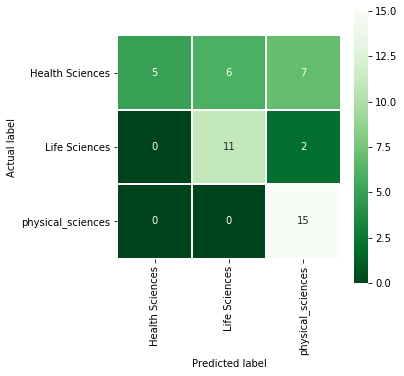

In [28]:
#plotting the confuion matrix an etc.

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.8, square = True, cmap = 'Greens_r',xticklabels=lr.classes_,yticklabels=lr.classes_);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');



# SVM

In [29]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y ,test_size=0.2,random_state=101)

In [30]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(train_x, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
y_pred = svclassifier.predict(test_x)
y_pred

print("Test Accuracy  :: ", accuracy_score(test_y, y_pred))

Test Accuracy  ::  0.782608695652174


In [32]:
from sklearn.metrics import classification_report, confusion_matrix
Cmatrix = confusion_matrix(test_y,y_pred)
print(classification_report(test_y,y_pred))

                   precision    recall  f1-score   support

  Health Sciences       1.00      0.56      0.71        18
    Life Sciences       0.75      0.92      0.83        13
physical_sciences       0.70      0.93      0.80        15

      avg / total       0.83      0.78      0.77        46



In [33]:
Cmatrix

array([[10,  3,  5],
       [ 0, 12,  1],
       [ 0,  1, 14]], dtype=int64)

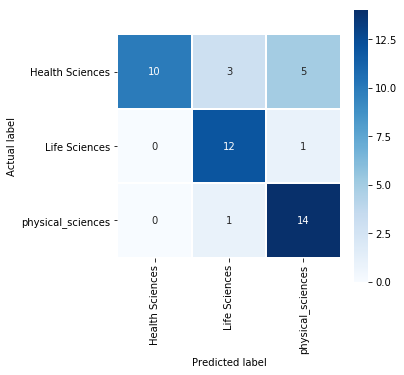

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5,5))
sns.heatmap(Cmatrix, annot=True, fmt=".0f", linewidths=.8, square = True, cmap = 'Blues',xticklabels=lr.classes_, yticklabels=lr.classes_);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

# Random Forest

In [35]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

In [36]:
train_x.shape

(184, 27943)

In [37]:

# Model Training

from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(n_estimators=100, random_state=101)
RF_classifier.fit(train_x, train_y)
y_pred = RF_classifier.predict(test_x)

C:\Users\mahimouni\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [38]:
y_pred

print("Test Accuracy  :: ", accuracy_score(test_y, y_pred))

Test Accuracy  ::  0.8260869565217391


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
Cmatrix = confusion_matrix(test_y,y_pred)
print(classification_report(test_y,y_pred))

                   precision    recall  f1-score   support

  Health Sciences       0.79      0.83      0.81        18
    Life Sciences       0.77      0.77      0.77        13
physical_sciences       0.93      0.87      0.90        15

      avg / total       0.83      0.83      0.83        46



Test Accuracy  ::  0.8260869565217391


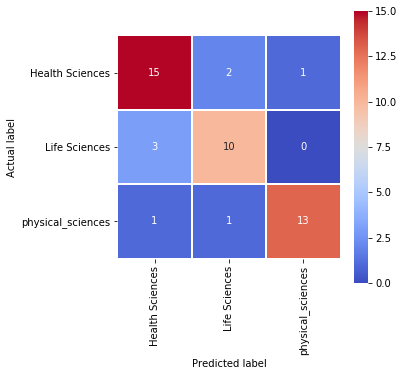

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Test Accuracy  :: ", accuracy_score(test_y, y_pred))

plt.figure(figsize=(5,5))
sns.heatmap(Cmatrix, annot=True, fmt=".0f", linewidths=.8, square = True, cmap = 'coolwarm',xticklabels=lr.classes_, yticklabels=lr.classes_);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

# KMeans

In [41]:
import pandas

import pylab as pl

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [42]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Topic_encoded = label_encoder.fit_transform(data['Topic'])
Topic_encoded # which contains the list of numeric values inwhich each values represents a category

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [43]:



Y = Topic_encoded
Y = Y.reshape(1,-1)
x


In [50]:
x.shape

(230, 27943)

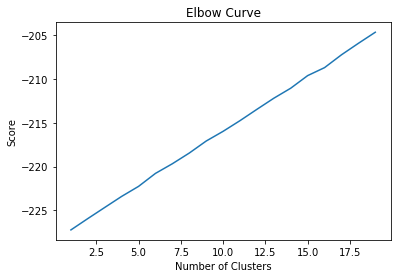

In [52]:
Nc = range(1, 20)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]

score

pl.plot(Nc,score)

pl.xlabel('Number of Clusters')

pl.ylabel('Score')

pl.title('Elbow Curve')

pl.show()